# Laboratorium 5 - sprawozdanie

Zadanie 1

Dla i = 1 x = [1,1]<br>
Dla i = 2 x = [2,0]

In [3]:
import numpy
import numpy.linalg
A = numpy.array([[1,1],[1,1.0001]])
print("Współczynnik uwarunkowania macierzy A: ",numpy.linalg.cond(A,1))
print("Jest on duży dlatego mała zmiana wektora b powoduje duże zmiany wyników - macierz jest źle uwarunkowana")

Współczynnik uwarunkowania macierzy A:  40004.0001000044
Jest on duży dlatego mała zmiana wektora b powoduje duże zmiany wyników - macierz jest źle uwarunkowana


Zadanie 2

In [2]:
import numpy
from scipy.linalg import hilbert
import scipy.linalg
import math

A = hilbert(8)
n_kol = scipy.linalg.norm(A, ord = 1)
n_kol1 = scipy.linalg.norm(numpy.linalg.inv(A), ord = 1)
print("Dla normy kolumnowej: ",n_kol*n_kol1)
n_wier = scipy.linalg.norm(A, ord = numpy.inf)
n_wier1 = scipy.linalg.norm(numpy.linalg.inv(A), ord = numpy.inf)
print("Dla normy wierszowej: ",n_wier*n_wier1) 
eigenvals, eigenvect = (numpy.linalg.eig(numpy.matmul(numpy.transpose(A),A)))
eigenvals1, eigenvect = (numpy.linalg.eig(numpy.matmul(numpy.transpose(numpy.linalg.inv(A)),numpy.linalg.inv(A))))
n_spek = math.sqrt(max(eigenvals))*math.sqrt(max(eigenvals1))
print("Dla normy spektralnej: ",n_spek)

print("Współczynniki uwarunkowania są duże czy macierz Hilberta jest źle uwarunkowana")


Dla normy kolumnowej:  33872789110.107353
Dla normy wierszowej:  33872789109.757656
Dla normy spektralnej:  15257574847.190962
Współczynniki uwarunkowania są duże czy macierz Hilberta jest źle uwarunkowana


Zadanie 3

In [3]:
import time

n = 20

t = numpy.linspace(0,1,n)
b = [math.cos(4*i) for i in t]
A = numpy.vander(t,increasing=True)


start_solve = time.time()
for i in range (0,10000):
    numpy.linalg.solve(A,b)
end_solve = time.time()
time_solve = (end_solve-start_solve)/10000
x_solve = numpy.linalg.solve(A,b)#obliczone metodą solve
r_solve = b - numpy.matmul(A,x_solve)
norm_solve = numpy.linalg.norm(r_solve)


Q,R = numpy.linalg.qr(A)

"""
Ax = b
QRx = b
Rx = (Q^-1)b ale Q jest m.ortogonalna => Q^-1 = Q^T
Rx = (Q^T)b
"""

start_qr = time.time()
for i in range (0,10000):
    scipy.linalg.solve_triangular(R, numpy.matmul(numpy.transpose(Q),b))
end_qr = time.time()
time_qr = (end_qr-start_qr)/10000
x_qr = scipy.linalg.solve_triangular(R, numpy.matmul(numpy.transpose(Q),b)) #metoda qr
r_qr = b - numpy.matmul(A,x_qr)
norm_qr = numpy.linalg.norm(r_qr)



start_lstsq = time.time()
for i in range (0,10000):
    numpy.linalg.lstsq(A,b,rcond=None)
end_lstsq = time.time()
time_lstsq = (end_lstsq-start_lstsq)/10000
x_lstsq = numpy.linalg.lstsq(A,b,rcond=None)
x_lstsq = x_lstsq[0] #metoda lstsq
r_lstsq = b - numpy.matmul(A,x_lstsq)
norm_lstsq = numpy.linalg.norm(r_lstsq)

print("solve: ",x_solve) 
print("lstsq: ",x_lstsq)
print("qr: ",x_qr)

print("Wydajność :")
print("Solve : ",time_solve)
print("QR : ",time_qr)
print("Lstsq : ",time_lstsq)
print("Najwydajniesza jest metoda solve, najmniej wydajna jest metoda lstsq.")


#korzystam z normy euklidesowej dla wektorów residuum
print("Porównanie norm :")
print("Solve : ",norm_solve)
print("QR : ",norm_qr)
print("Lstsq : ",norm_lstsq)
print("Najmniejszą norme daje metoda solve => daje najdokładniejsze rozwiązanie")

solve:  [ 1.00000000e+00  3.32764927e-11 -8.00000000e+00  6.35818437e-08
  1.06666656e+01  1.19699204e-05 -5.68898363e+00  5.53922234e-04
  1.62293934e+00  8.41840595e-03 -3.11464449e-01  4.71900888e-02
 -4.25883553e-02  9.95878711e-02 -1.01598838e-01  7.36115670e-02
 -3.99387587e-02  1.50687889e-02 -3.49070550e-03  3.73507626e-04]
lstsq:  [ 1.00000000e+00  1.32997475e-11 -8.00000000e+00  2.27399505e-08
  1.06666663e+01  3.63061300e-06 -5.68891467e+00  1.32078403e-04
  1.62489928e+00  1.38430832e-03 -2.91765386e-01  3.94194537e-03
  3.18156585e-02 -1.48548542e-04  1.32017843e-03 -6.46255172e-03
  5.44668767e-03 -2.60035272e-03  7.30549910e-04 -9.27605996e-05]
qr:  [ 1.00000000e+00 -3.68180914e-11 -8.00000000e+00 -6.68040308e-08
  1.06666678e+01 -1.18047669e-05 -5.68879853e+00 -5.10732658e-04
  1.62758794e+00 -7.26294062e-03 -2.70154238e-01 -3.82348552e-02
  9.60780538e-02 -7.61559375e-02  7.02589345e-02 -5.34097741e-02
  2.86281041e-02 -1.04196293e-02  2.33851891e-03 -2.44422212e-04]
W

Zadanie 4

Współczynniki uwarunkowania:  [1.0600219655745877, 1.8651827923582753, 9.402260643647645, 3850.828950152734, 2262.557182234505, 5485.289249728959]
Metoda solve:  [7.199925901601408e-15, 1.1538567414516022e-14, 1.5861845525636443e-14, 1.5076655006895407e-12, 3.043359288292125e-12, 1.7525400550480462e-11]
Metoda bigc:  [3.337414472543916e-05, 2.0017212714412418e-05, 0.00011538346478159317, 8.674813704648735e-05, 0.00012769444362323372, 7.994432615278592e-05]
Metoda gmres:  [3.337075485954394e-05, 0.00012753186041917374, 9.791349512894903e-05, 0.03697348543302465, 0.2104859581483172, 0.424673938201494]
[0.0017843246459960938, 0.0012938976287841797, 0.0012841224670410156, 0.0014348030090332031, 0.0016171932220458984, 0.0017161369323730469] [0.0007107257843017578, 0.0008709430694580078, 0.0016989707946777344, 0.06617975234985352, 0.0707557201385498, 0.06963062286376953] [0.00032448768615722656, 0.00041747093200683594, 0.0008847713470458984, 3.8858799934387207, 3.971334457397461, 4.254789113

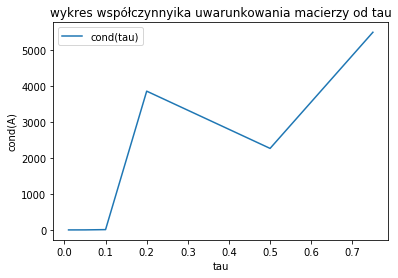

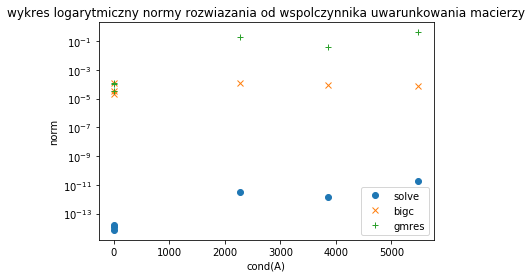

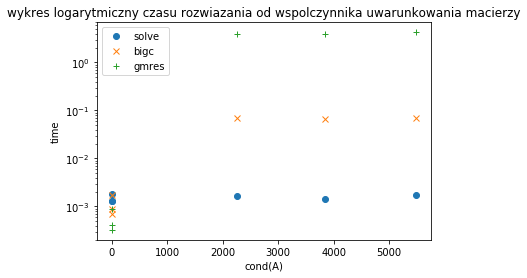

Dla wzrostu tau wzrasta współczynnik uwarunkowania macierzy A
Dla większych współczynników uwarunkowania macierzy A norma residuum zwiększa się logarytmicznie - ma duży wpływ na dokładność rozwiązania
Dla większych współczynników uwarunkowania macierzy A czas wykonywania wzrasta logarytmicznie (jedynie metoda solve zachowuje czas w tym samym rzędzie wielkości)


In [14]:
import math
import matplotlib.pyplot as plt
import scipy.sparse.linalg
import time
n = 500
a = numpy.random.uniform(-1,1,n*n).reshape((n,n))
A = numpy.tril(a) + numpy.tril(a, -1).T
for i in range (0,n):
    A[i,i] = 1
b = numpy.random.uniform(-1,1,n)
tau = [0.01, 0.05, 0.1, 0.2, 0.5, 0.75]
conds=[]
solve_norm=[]
bigc_norm=[]
gmres_norm=[]
solve_times=[]
bigc_times=[]
gmres_times=[]
for i in tau:
    tmp = A.copy()
    for j in range (0,n):
        for k in range (0,j):
            if abs(tmp[j,k])>i:
                tmp[j,k] = 0
                tmp[k,j] = 0
    conds.append(numpy.linalg.cond(tmp))
    m_rzadka = scipy.sparse.csr_matrix(tmp)
    start = time.time()
    x_solve = numpy.linalg.solve(tmp,b)#obliczone metodą solve
    solve_times.append(time.time()-start)
    start = time.time()
    x_bigc = scipy.sparse.linalg.bicg(tmp,b)[0]#metoda bigc
    bigc_times.append(time.time()-start)
    start = time.time()
    x_gmres = scipy.sparse.linalg.gmres(tmp,b)[0]#metoda gmres
    gmres_times.append(time.time()-start)
    solve_norm.append(numpy.linalg.norm(b-numpy.matmul(tmp,x_solve)))
    bigc_norm.append(numpy.linalg.norm(b-numpy.matmul(tmp,x_bigc)))
    gmres_norm.append(numpy.linalg.norm(b-numpy.matmul(tmp,x_gmres)))
print("Współczynniki uwarunkowania: ",conds)
print("Metoda solve: ",solve_norm)
print("Metoda bigc: ",bigc_norm)
print("Metoda gmres: ",gmres_norm)
print(solve_times,bigc_times,gmres_times)
plt.figure()
plt.plot(tau,conds,label='cond(tau)')
plt.title('wykres współczynnyika uwarunkowania macierzy od tau')
plt.xlabel('tau')
plt.ylabel('cond(A)')
plt.legend()
plt.show()

plt.figure()
plt.semilogy(conds,solve_norm,"o",label='solve')
plt.semilogy(conds,bigc_norm,"x",label='bigc')
plt.semilogy(conds,gmres_norm,"+",label='gmres')
plt.title('wykres logarytmiczny normy rozwiazania od wspolczynnika uwarunkowania macierzy')
plt.xlabel('cond(A)')
plt.ylabel('norm')
plt.legend()
plt.show()

plt.figure()
plt.semilogy(conds,solve_times,"o",label='solve')
plt.semilogy(conds,bigc_times,"x",label='bigc')
plt.semilogy(conds,gmres_times,"+",label='gmres')
plt.title('wykres logarytmiczny czasu rozwiazania od wspolczynnika uwarunkowania macierzy')
plt.xlabel('cond(A)')
plt.ylabel('time')
plt.legend()
plt.show()

print("Dla wzrostu tau wzrasta współczynnik uwarunkowania macierzy A")
#ciężko zaobserwować zależność cond(A) od tau ze wzgledu na randomizacje tworzenia macierzy A ale ogólnie najmniejsze cond są dla małych tau, wieksze cond są dla większych tau 
print("Dla większych współczynników uwarunkowania macierzy A norma residuum zwiększa się logarytmicznie - ma duży wpływ na dokładność rozwiązania")
print("Dla większych współczynników uwarunkowania macierzy A czas wykonywania wzrasta logarytmicznie (jedynie metoda solve zachowuje czas w tym samym rzędzie wielkości)")
print("Najmniej efektywny jest gmres bo daje najwieksza norme residuum i najdłużej trwa, najlepiej spisuje sie metoda solve")

Zadanie 5

In [29]:
A = numpy.array([[1,2,3],[2,1,3],[3,2,1]])
b = numpy.array([1,2,0])
x = numpy.linalg.solve(A,b)
print("Rozwiązanie metodą solve: ",x)

#https://pl.wikipedia.org/wiki/Metoda_Gaussa-Seidla
#x_(k+1)= (L1)^-1*(-U*x_(k)+b) gdzie L1 to L+U czyli macierz trójkątna dolna z wartościami diadonalnymi
#warunek stopu: max_iter lub |x_k+1-x_k|<epsilon (różnica norm jest mniejsza od epsilon)
def gauss_seidel(A,b,epsilon,max_iter):
    L1 = numpy.tril(A)
    U = A - L1
    x_k = numpy.ones(len(b)) - numpy.ones(len(b)) #generowanie zerowego wektora
    iter=0 #licznik iteracji
    while(iter<max_iter):
        iter+=1
        x_k1 = numpy.dot(numpy.linalg.inv(L1), b - numpy.dot(U, x_k)) #implementacja linii 8
        norm = abs(numpy.linalg.norm(b-numpy.matmul(A,x_k1))-numpy.linalg.norm(b-numpy.matmul(A,x_k)))
        x_k = x_k1
        if(epsilon>norm or iter>100):
            break
    return x_k1
    
x_k1 = gauss_seidel(A,b,math.pow(10,-10),100)
print("Rozwiązanie metodą Gaussa-Seidela: ",x_k1)
print("Dla tego układu metoda nie działa ponieważ macierz A nie spełnia kryteriów silnej ani słabej dominacji kolumnowej i rzędowej ani nie jest dodatnio określona bo M_2=-3<0")
print("Metoda działa dla np:")
A = numpy.array([[4,-1,1],[1,6,1],[-1,2,5]])
print(A)
print("Powyższa macierz A jest silnie dominująca w rzędach")
b = numpy.array([4,9,2])
x = numpy.linalg.solve(A,b)
print("Rozwiązanie metodą solve: ",x)
x_k1 = gauss_seidel(A,b,math.pow(10,-10),100)
print("Rozwiązanie metodą Gaussa-Seidela: ",x_k1," błąd: ",numpy.linalg.norm(b-numpy.matmul(A,x_k1)))
print("Widać, że dla dobrych danych wejściowych implementacja jest poprawna")

Rozwiązanie metodą solve:  [ 0.25 -0.75  0.75]
Rozwiązanie metodą Gaussa-Seidela:  [-9.71400324e+60 -2.37837221e+62  5.04816453e+62]
Dla tego układu metoda nie działa ponieważ macierz A nie spełnia kryteriów silnej ani słabej dominacji kolumnowej i rzędowej ani nie jest dodatnio określona bo M_2=-3<0
Metoda działa dla np:
[[ 4 -1  1]
 [ 1  6  1]
 [-1  2  5]]
Macierz A jest silnie dominująca w rzędach
Rozwiązanie metodą solve:  [1.27777778 1.26190476 0.15079365]
Rozwiązanie metodą Gaussa-Seidela:  [1.27777778 1.26190476 0.15079365]  błąd:  3.58365189069606e-12
Widać, że dla dobrych danych wejściowych implementacja jest poprawna
